In [1]:
# seaborn 설치
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.dates as md
sns.set(style='darkgrid')

# 주피터 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게끔 만드는 코드
%matplotlib inline

In [3]:
a = pd.read_csv('csv_file/kr20_ver2.csv')
b = pd.read_csv('csv_file/corona_cases_ver2.csv')

In [4]:
a

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym
0,2020-08-12,안녕하세요 보겸입니다,보겸 BK,24,2020-08-09T09:32:48Z,보겸|bokyem,5947503,53326,105756,139946,20-08
1,2020-08-12,부락토스의 계획 [총몇명 프리퀄],총몇명,1,2020-08-12T09:00:08Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,20-08
2,2020-08-12,평생 반성하면서 살겠습니다.,양팡 YangPang,22,2020-08-10T09:54:13Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,20-08
3,2020-08-12,안녕하세요 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,24,2020-08-11T15:00:58Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,20-08
4,2020-08-12,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,10,2020-08-11T09:00:13Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,20-08
...,...,...,...,...,...,...,...,...,...,...,...
88749,2021-11-07,KT에 한달에 50만원 쓰는 사람의 최후,UPSub없섭,28,2021-10-25T05:15:00Z,잇섭|없섭|itsub|upsub|잇섭 kt|없섭 kt|kt 인터넷|kt 디도스|kt...,2990589,43297,1473,3642,21-11
88750,2021-11-07,[김장장TV 이십세기들 ep.66] 돈 많이 번 장항준!왜 아직도 윤종신한텐 얻어먹을까?,김장장TV이십세기들,24,2021-10-27T03:00:30Z,[None],190984,4498,73,228,21-11
88751,2021-11-07,*실제상황* 지진이 왔을때 일본인아내의 반응 #shorts,제주커플jeju-couple,22,2021-10-29T02:37:03Z,짧은동영상|국제커플|커플vlog|커플몰카|반응보기|한일커플|커플|カップル|モニタリン...,1284149,15973,640,713,21-11
88752,2021-11-07,누리호가 찍은 지구! 누리호 동체 탑재카메라 촬영영상,한국항공우주연구원 KARI TV,28,2021-10-27T01:09:15Z,KARI|Korea Aerospace Research Institute|한국항공우주...,679769,16389,293,2250,21-11


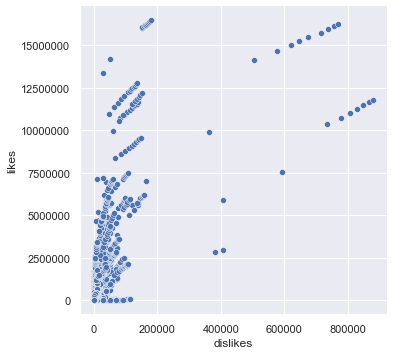

In [5]:
#일정 기울기 이하는 싫어요 비율이 높은건데, 어떤 카테고리가 있는지 볼만할듯
#조회수가 너무 적은 data는 제외할 필요도 있긴 함. 조건문 잘 사용해야함
sns.relplot(x='dislikes', y='likes', data=a)
#scientific notation 제거
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

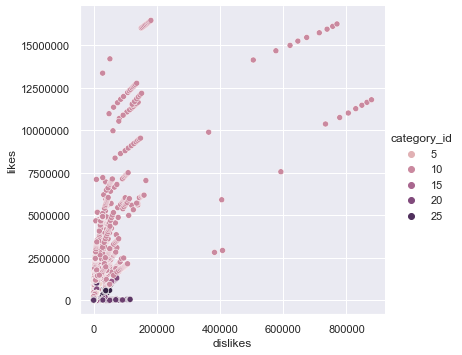

In [6]:
#hue = 특정기준으로 색조 표시.  hue만가지고는 뚜렷한 구분 어려움.
sns.relplot(x='dislikes', y='likes', data=a, hue='category_id')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

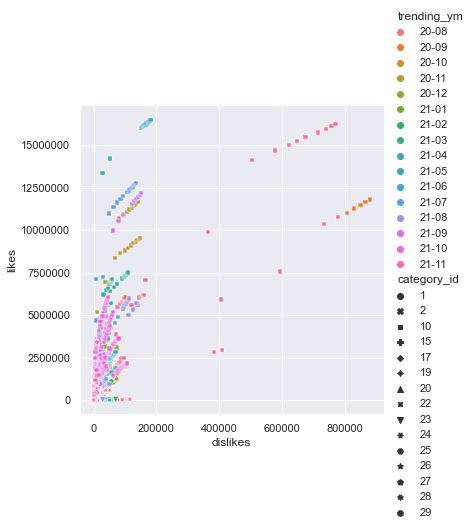

In [7]:
#style & hue 
sns.relplot(x='dislikes', y='likes', data=a, style='category_id', hue='trending_ym')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

#style에 차이를 주니 모양을 보면 음악이 dislike비중이 높아보인다.

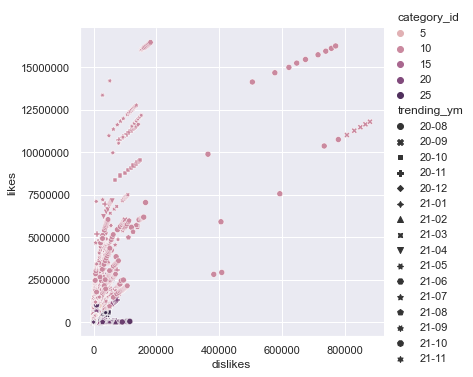

In [8]:
#style & hue 
sns.relplot(x='dislikes', y='likes', data=a, style='trending_ym', hue='category_id')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
#두개를 바꿔가며 보니까 20번대가 밑에 깔려있음. 23번 comedy 24번 entertain 25번 정치가 싫어요 비율이 높음

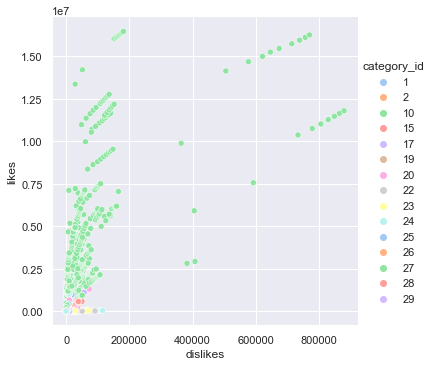

In [9]:
#색상 선택해주기1 (palette에는 홈페이지에서 원하는 색상 아무거나 갖고오면 됨)
sns.relplot(x='dislikes', y='likes', data=a, hue='category_id', palette='pastel')

#이렇게 확인하니 실제로는 22 Blog ,23Comedy가 싫어요 비중이 높은걸 알 수 있음

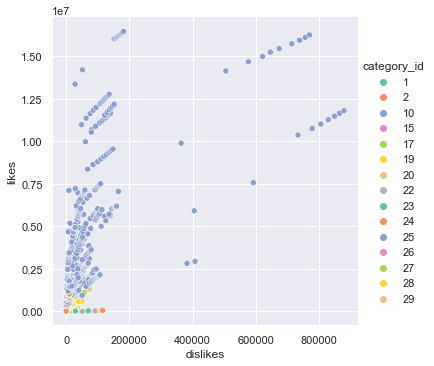

In [10]:
#색상 선택해주기2
sns.relplot(x='dislikes', y='likes', data=a, hue='category_id', palette='Set2')

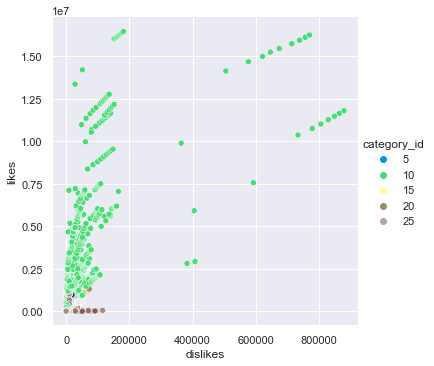

In [11]:
#색상 선택해주기3
sns.relplot(x='dislikes', y='likes', data=a, hue='category_id', palette='terrain')

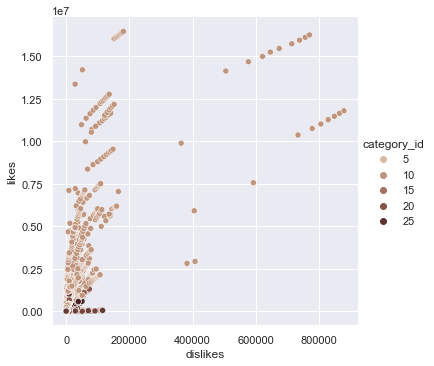

In [12]:
#색상 선택해주기4 , 일부러 palette값에 오타내서 에러명에서 어떤게 있는지 확인하고 넣어볼 수 있음
sns.relplot(x='dislikes', y='likes', data=a, hue='category_id', palette='ch:s=.85,rot=.15')

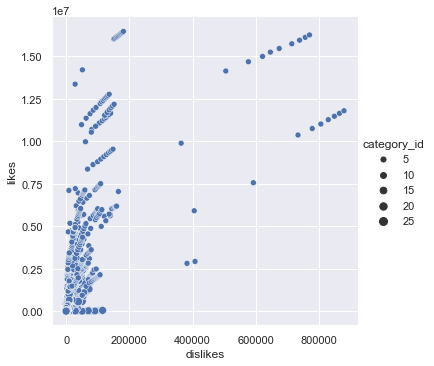

In [13]:
#size값 넣어보기
sns.relplot(x='dislikes', y='likes', data=a, size='category_id')

In [14]:
#그냥 sum은 저 500개 다합친 sum값 1개가 나오고, cumsum은 하나씩 더해지는 축적된 값이 반한됨. array형태
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
df

,time,value
0,0,0.323072
1,1,1.185845
2,2,0.883336
3,3,2.295379
4,4,2.102664
...,...,...
495,495,-13.119965
496,496,-13.635726
497,497,-13.695519
498,498,-12.859852


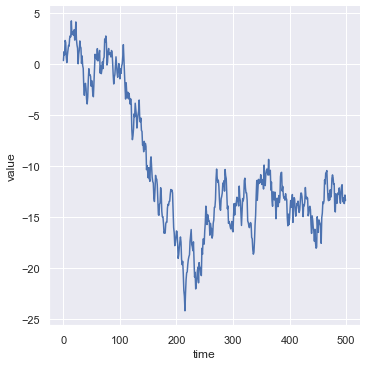

In [15]:
sns.relplot(x='time', y='value', data=df, kind='line')

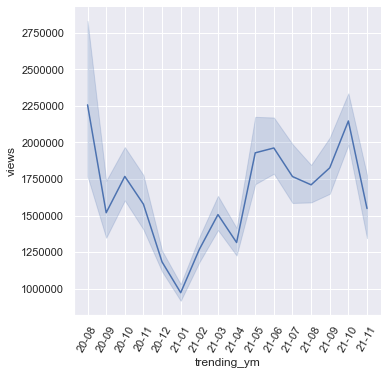

In [16]:
#이 순서대로해야 잘못된 데이터값 안나옴
sns.relplot(x='trending_ym', y='views', data=a, kind='line')
plt.xticks(rotation=60)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

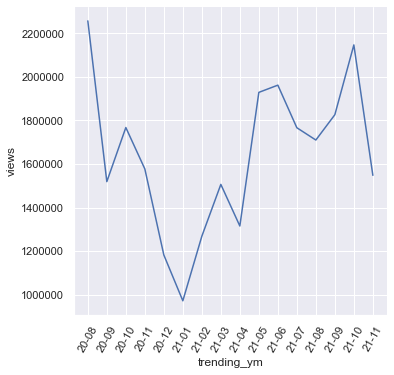

In [17]:
#ci=Nono 옵션, 평균치만 보여줌
sns.relplot(x='trending_ym', y='views', data=a, kind='line', ci=None)
plt.xticks(rotation=60)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

Text(0, 0.5, 'Total Cases')

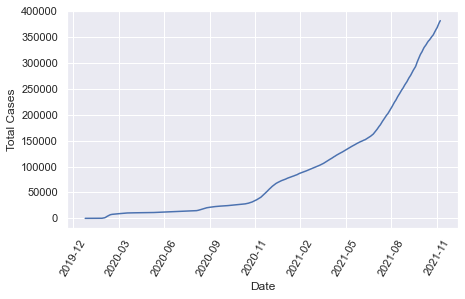

In [18]:
#X축 날짜 ticks 축소하여 시각화
b['date']=pd.to_datetime(b['date'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize = (7, 4))
sns.lineplot(ax = ax, x='date', y='total_cases', data=b)

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 0, interval=12))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 60)
# # specify the position of the minor ticks at each day
# ax.xaxis.set_minor_locator(md.DayLocator(interval = 10))
# # set ticks length
# ax.tick_params(axis = 'x', which = 'major', length = 10)
# ax.tick_params(axis = 'x', which = 'minor', length = 5)

plt.xlabel('Date')
plt.ylabel('Total Cases')

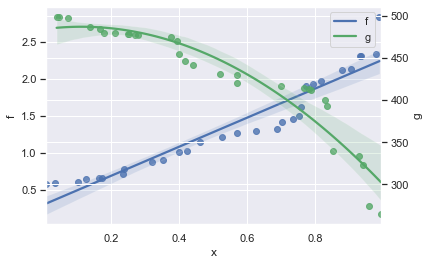

In [19]:
# 2개의 dataframe을 하나의 figure 안에 시각화 하는 법. twinx() 메서드 
df1 = pd.DataFrame({"x": np.sort(np.random.rand(30)),
                    "f": np.sort(np.random.rayleigh(size=30))})
df2 = pd.DataFrame({"x": np.sort(np.random.rand(30)),
                    "g": 500-0.1*np.sort(np.random.rayleigh(20,size=30))**2})

fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.regplot(x="x", y="f", data=df1, order=1, ax=ax)
sns.regplot(x="x", y="g", data=df2, order=2, color='g', ax=ax2)

ax2.legend(handles=[a.lines[0] for a in [ax,ax2]], 
           labels=["f", "g"])
plt.show()

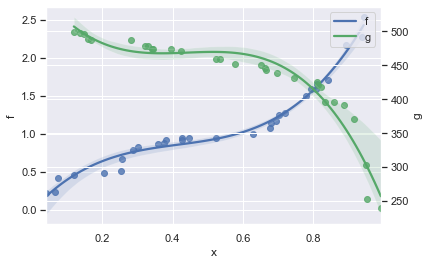

In [20]:
#regplot 옵션 중 order 파악. 경향성 그래프 굴곡 정도
df1 = pd.DataFrame({"x": np.sort(np.random.rand(30)),
                    "f": np.sort(np.random.rayleigh(size=30))})
df2 = pd.DataFrame({"x": np.sort(np.random.rand(30)),
                    "g": 500-0.1*np.sort(np.random.rayleigh(20,size=30))**2})

fig, ax = plt.subplots()
sns.regplot(x="x", y="f", data=df1, order=3, ax=ax)
ax2 = ax.twinx()
sns.regplot(x="x", y="g", data=df2, order=3, color='g', ax=ax2)

ax2.legend(handles=[a.lines[0] for a in [ax,ax2]], labels=["f", "g"])
plt.show()

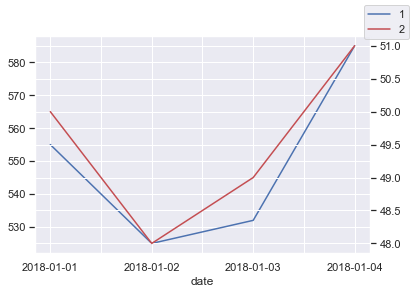

In [21]:
#나중에 코로나 데이터랑 , 유튜브 데이터랑 합쳐서 그리기가능 / 그냥 pyplot 사용한 경우
df = pd.DataFrame({"date": ["2018-01-01", "2018-01-02", "2018-01-03", "2018-01-04"],
                   "column1": [555,525,532,585], 
                   "column2": [50,48,49,51]})

ax = df.plot(x="date", y="column1", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="column2", ax=ax2, legend=False, color="r")
ax.figure.legend(labels=['1','2'])
plt.show()

In [22]:
#year_month 칼럼 새로 만들어준건데, 사실 지금와선 크게필요없음
b['date'] = pd.to_datetime(b['date'])
b['year'] = b['date'].dt.year
b['month'] = b['date'].dt.month
b['year_month'] = b['year'].map(str) + '-' + b['month'].map(str)
b['year_month'] = pd.to_datetime(b['year_month'], format='%Y-%m').dt.strftime('%y-%m')

In [23]:
b

,date,local_outbreak,imported_cases,death,total_death,new_cases,total_cases,variation,year_month,year,month
0,2020-01-21,0,0,0,0,0,0,0,20-01,2020,1
1,2020-01-22,0,0,0,0,0,0,0,20-01,2020,1
2,2020-01-23,0,0,0,0,0,0,0,20-01,2020,1
3,2020-01-24,0,1,0,0,1,1,1,20-01,2020,1
4,2020-01-25,0,0,0,0,0,1,-1,20-01,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
653,2021-11-04,"2,457",25,24,2916,2482,373119,-185,21-11,2021,11
654,2021-11-05,"2,323",20,20,2936,2343,375462,-139,21-11,2021,11
655,2021-11-06,"2,218",29,20,2956,2247,377709,-96,21-11,2021,11
656,2021-11-07,"2,204",20,11,2967,2224,379933,-23,21-11,2021,11


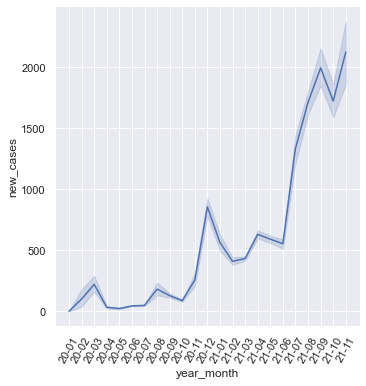

In [24]:
sns.relplot(x='year_month', y='new_cases', data=b, kind='line')
locs, labels = plt.xticks()
plt.setp(labels, rotation=60)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

In [25]:
#inf 값 및 NaN 값 발생  0으로 나눌경우 inf, 둘다 0값이면 NaN 으로 표기됨
b['test2'] = b['total_cases'] / b['new_cases']

In [26]:
b['test2'].head()

0    NaN
1    NaN
2    NaN
3    1.0
4    inf
Name: test2, dtype: float64

In [27]:
a['comments_per_views_x1000'] = a['comment_count']/a['views']*1000

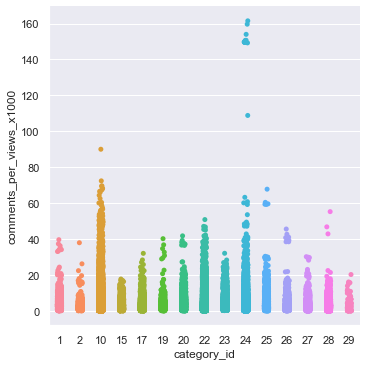

In [28]:
#저기서 코로나, 백신관련 data는 따로 style이나 hue줘서 구분짓게 해도 좋을듯 코멘트가 많다는건 핫이슈란것
#24번 카테고리가 댓글수가 많은데, 개인방송들이 많아 댓글이 많은것으로 보임
#차후 카테고리 id는 이름뜨게 변경가능
sns.catplot(x='category_id', y='comments_per_views_x1000', data=a)

In [29]:
# swarm은 퍼트려주는 역할을 하는데, 빅데이터에서 절대불가능
# sns.catplot(x='category_id', y='comments_per_views_x1000', data=tips, kind='swarm')

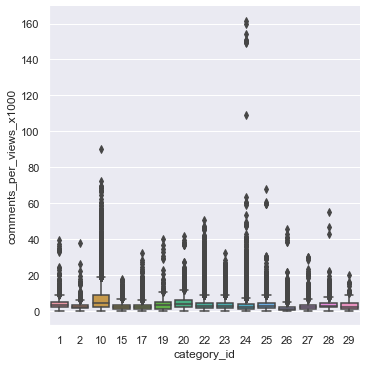

In [30]:
#이렇게 box플랏으로 확인해보니 막상 평균은 음악, 게임, 여행, 정치 순임. 24번이 튀는값이 있는데 정작 평균은 낮음
#며조회수 0인 data 제거 안되어있기 때문에 평균이 낮음
#음악은 좋으면 댓글 다는 비중이 높아서 그런듯, 게임도 그렇고
sns.catplot(x='category_id', y='comments_per_views_x1000', data=a, kind='box')

In [31]:
#결측값 확인, 7개나 . 나누기 하면서 발생한 것
a.isnull().sum()

trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
trending_ym                 0
comments_per_views_x1000    7
dtype: int64

In [32]:
a = a.dropna(axis=0)

In [33]:
a.isnull().sum()

trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
trending_ym                 0
comments_per_views_x1000    0
dtype: int64

In [34]:
# 너무 낮은 값 데이터 제거
a = a[a['comments_per_views_x1000']>15]

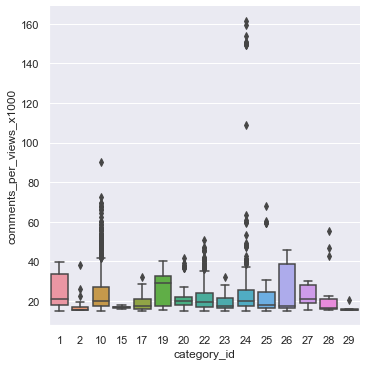

In [35]:
sns.catplot(x='category_id', y='comments_per_views_x1000', data=a, kind='box')

In [36]:
#이건 count 형식이 아님
#sns.catplot(x='category_id', y='comments_per_views_x1000', data=tips, kind='count')

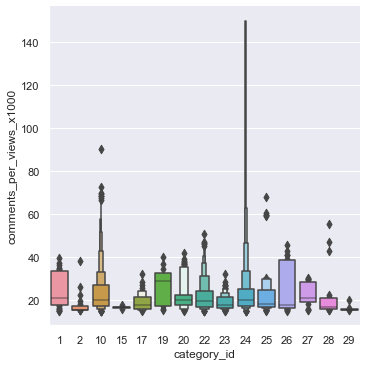

In [37]:
sns.catplot(x='category_id', y='comments_per_views_x1000', data=a, kind='boxen')

C:\Users\seongkyu\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


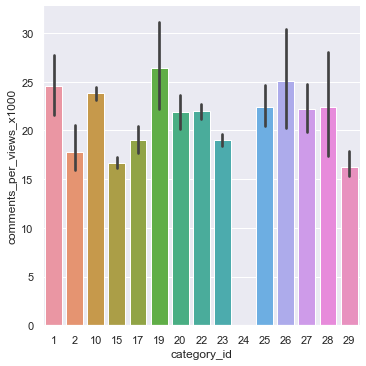

In [38]:
sns.catplot(x='category_id', y='comments_per_views_x1000', data=a, kind='bar')
#무한대값 존재하는것 때문인지 오류발생

C:\Users\seongkyu\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


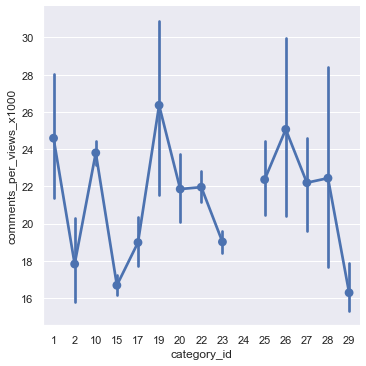

In [39]:
sns.catplot(x='category_id', y='comments_per_views_x1000', data=a, kind='point')

In [40]:
titanic = sns.load_dataset('titanic')

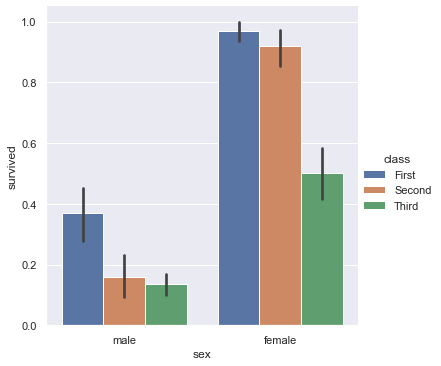

In [41]:
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=titanic)

In [42]:
df = pd.DataFrame(np.random.randn(500, 2), columns=['1', '2'])
df

,1,2
0,0.722455,0.000167
1,-0.566992,-0.801713
2,-1.023549,2.494031
3,-0.262631,0.830356
4,0.420490,0.504870
...,...,...
495,0.866710,-0.288615
496,-0.917263,-0.444879
497,0.718360,-1.069799
498,-0.577632,-0.535571


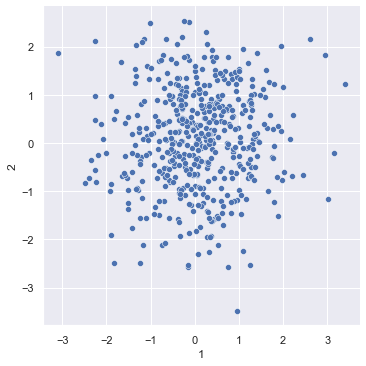

In [43]:
sns.relplot(x='1', y='2', data=df)

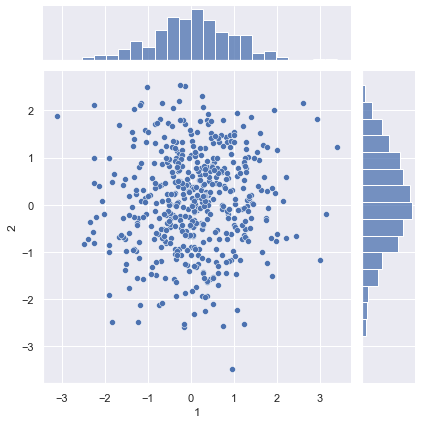

In [44]:
sns.jointplot(x='1', y='2', data=df)

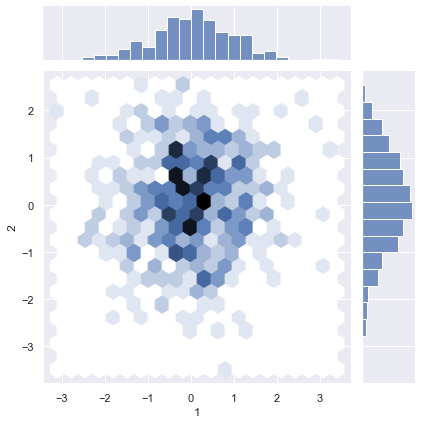

In [45]:
sns.jointplot(x='1', y='2', data=df, kind='hex')

In [46]:
from datetime import date, datetime
a['trending_date2']=pd.to_datetime(a['trending_date']).dt.date
a

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,trending_ym,comments_per_views_x1000,trending_date2
0,2020-08-12,안녕하세요 보겸입니다,보겸 BK,24,2020-08-09T09:32:48Z,보겸|bokyem,5947503,53326,105756,139946,20-08,23.530211,2020-08-12
2,2020-08-12,평생 반성하면서 살겠습니다.,양팡 YangPang,22,2020-08-10T09:54:13Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,20-08,17.177220,2020-08-12
7,2020-08-12,진심으로 사과드립니다. 죄송합니다.,임다TV,24,2020-08-11T14:00:01Z,[None],659743,13040,13337,18286,20-08,27.716853,2020-08-12
8,2020-08-12,집에 혼자 있을 때 하는 짓ㅋㅋㅋㅋㅋㅋㅋ [밍꼬발랄],밍꼬발랄Mingggo,23,2020-08-12T09:00:02Z,밍꼬발랄|밍꼬|꼬밍|발랄|모아보기|이어보기|정주행|꿀잼|꿀팁|유형|유형별|꼭있는유형...,340149,13166,338,5697,20-08,16.748543,2020-08-12
38,2020-08-12,드릴말씀있습니다.,애주가TV참PD,22,2020-08-07T14:46:01Z,먹방|술먹방|Mukbang|애주가|참피디|혼술|술안주,3378234,16726,73933,67130,20-08,19.871329,2020-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88586,2021-11-07,태국 마지막 회,가든의 세계여행,19,2021-11-06T12:35:36Z,[None],74152,5342,95,1677,21-11,22.615708,2021-11-07
88610,2021-11-07,D-DAY : EP.02 [동원이가 그리는 아낌없이 주는 나무],정동원TV,22,2021-11-04T06:19:04Z,[None],75162,8116,56,1198,21-11,15.938905,2021-11-07
88621,2021-11-07,무하마드의 일생,무하마드의 일생,22,2021-11-01T11:06:26Z,[None],337351,4127,97,5459,21-11,16.181959,2021-11-07
88694,2021-11-07,Falling (Original Song: Harry Styles) by JK of...,BANGTANTV,10,2021-10-28T14:59:58Z,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,19118372,3436845,10256,297759,21-11,15.574496,2021-11-07


In [47]:
a['trending_date'] = pd.to_datetime(a['trending_date'])
a['year'] = a['trending_date'].dt.year
a['month'] = a['trending_date'].dt.month
a['trending_ym'] = a['year'].map(str) + '-' + a['month'].map(str)
a['trending_ym'] = pd.to_datetime(a['trending_date'], format='%Y-%m').dt.strftime('%y-%m')

In [48]:
#year, month 칼럼 삭제, inplace 덮어쓰기 여부
a.drop(['year', 'month'], axis=1, inplace=True)

In [49]:
#csv_컬럼 순서 변경
cols = ['trending_date', 'title','channel_title','category_id','publish_time','tags','views','likes','dislikes','comment_count','trending_ym']
# b = pd.read_csv('csv_file/kr20_ver5.csv')
b = a[cols]
# d.to_csv('csv_file/kr20_ver6.csv', sep=',', index=False, encoding='utf-8-sig')

In [50]:
#18년도 데이터 변경
# a = pd.read_csv('csv_file/KRvideos.csv')
# a.drop(['video_id', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis=1, inplace=True)
# a.to_csv('csv_file/kr18_ver2.csv', sep=',', index=False, encoding='utf-8-sig')

In [51]:
# 18년도 data 점으로 표기된 날짜데이터 바꿔주기
# b = pd.read_csv('csv_file/kr18_ver2.csv')
# b['trending_date'] = pd.to_datetime(b['trending_date'], format="%y.%d.%m")
# b['year'] = b['trending_date'].dt.year
# b['month'] = b['trending_date'].dt.month

# b['trending_ym'] = b['year'].map(str) + '-' + b['month'].map(str)
# b['trending_ym'] = pd.to_datetime(b['trending_ym'], format='%Y-%m').dt.strftime('%y-%m')

# b.drop(['year', 'month'], axis=1, inplace=True)

# f = b[cols]
# f.to_csv('csv_file/kr18_ver3.csv', sep=',', index=False, encoding='utf-8-sig')

In [52]:
# a.to_csv('csv_file/kr20_ver2.csv', sep=',', index=False, encoding='utf-8-sig')
#trending_ym 양식이  yy-mm 형태가 아니라, 월-일 형태로 바뀌어서 저장됨.
#하지만 pandas 에서 읽을 땐 문제없이 정확하게 읽히니 걱정 No

In [53]:
# tips2['date'] = pd.to_datetime(tips2['date'])
# tips2['year'] = tips2['date'].dt.year
# tips2['month'] = tips2['date'].dt.month
# tips2['year_month'] = tips2['year'].map(str) + '-' + tips2['month'].map(str)
# tips2['year_month'] = pd.to_datetime(tips2['year_month'], format='%Y-%m').dt.strftime('%y-%m')

# tips2.drop(['year', 'month'], axis=1, inplace=True)
# tips2.to_csv('csv_file/corona_cases.csv', sep=',', index=False, encoding='utf-8-sig')

In [54]:
# tips3['date'] = pd.to_datetime(tips3['date'])
# tips3['year'] = tips3['date'].dt.year
# tips3['month'] = tips3['date'].dt.month
# tips3['year_month'] = tips3['year'].map(str) + '-' + tips3['month'].map(str)
# tips3['year_month'] = pd.to_datetime(tips2['year_month'], format='%y-%m').dt.strftime('%y-%m')

# tips3.drop(['year', 'month'], axis=1, inplace=True)
# tips3.to_csv('csv_file/same_period_cases.csv', sep=',', index=False)